In [1]:
# -*- coding: utf-8 -*-
"""
DDA 3020 Assignment 1

Created on Sun Feb 26 2023

@author: zhimingmei

"""

'\nDDA 3020 Assignment 1\n\nCreated on Sun Feb 26 2023\n\n@author: zhimingmei\n\n'

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn import preprocessing

import os
import math

In [3]:
# read data
data_path = '/Users/ryan/Desktop/CUHK(SZ)/Year 3 Term 2/DDA 3020/Assignment/A1'
input_file = 'boston.csv'

data = pd.read_csv(os.path.join(data_path, input_file))
data.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


#### Step 1: The overall data description and check for incomplete data

In [4]:
# check imcomplete data
def check_null(df):
    '''
    description: 
        if this dataset has null value, 
        then this function will help return the distribution of null value
    '''
    null_vals = df.isna().sum().sort_values(ascending=False)
    null_vals[null_vals>0]

    plt.title('Distribution of null values')
    null_vals[null_vals>0].plot(kind='hist')
    
    fig = plt.figure(figsize=(40,10))
    plt.title('Null value counts in columns')
    plt.xlabel('Columns')
    plt.ylabel('Counts')
    null_vals[null_vals>0].plot(kind='bar')

print('summary of nan data: ', data.isna().sum())
print('summary of null data: ', data.isnull().sum())

summary of nan data:  crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64
summary of null data:  crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64


#### Step 2: See target distribution w.r.t. different attributes

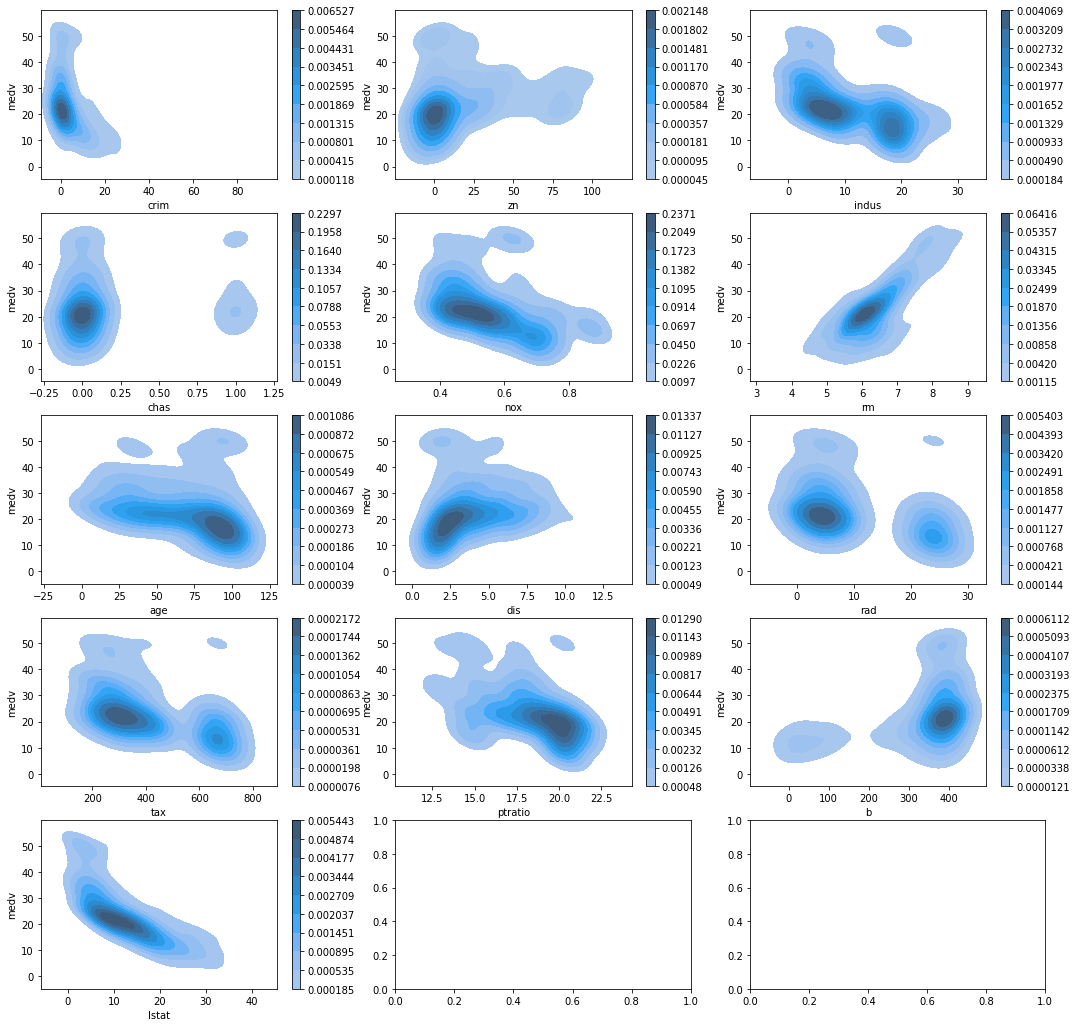

In [5]:
attributes = ['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat']
fig, axs = plt.subplots(5,3,figsize=(18,18))

for i in range(13):
       sns.kdeplot(data=data, x=attributes[i], y='medv', shade=True, cbar=True, ax=axs[i//3, i%3])
       # sns.histplot(data=data, x=attributes[i], y='medv', ax=axs[i//3, i%3])
plt.show()

#### Step 3: Draw the heatmap

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5]),
 [Text(0, 0.5, 'crim'),
  Text(0, 1.5, 'zn'),
  Text(0, 2.5, 'indus'),
  Text(0, 3.5, 'chas'),
  Text(0, 4.5, 'nox'),
  Text(0, 5.5, 'rm'),
  Text(0, 6.5, 'age'),
  Text(0, 7.5, 'dis'),
  Text(0, 8.5, 'rad'),
  Text(0, 9.5, 'tax'),
  Text(0, 10.5, 'ptratio'),
  Text(0, 11.5, 'b'),
  Text(0, 12.5, 'lstat'),
  Text(0, 13.5, 'medv')])

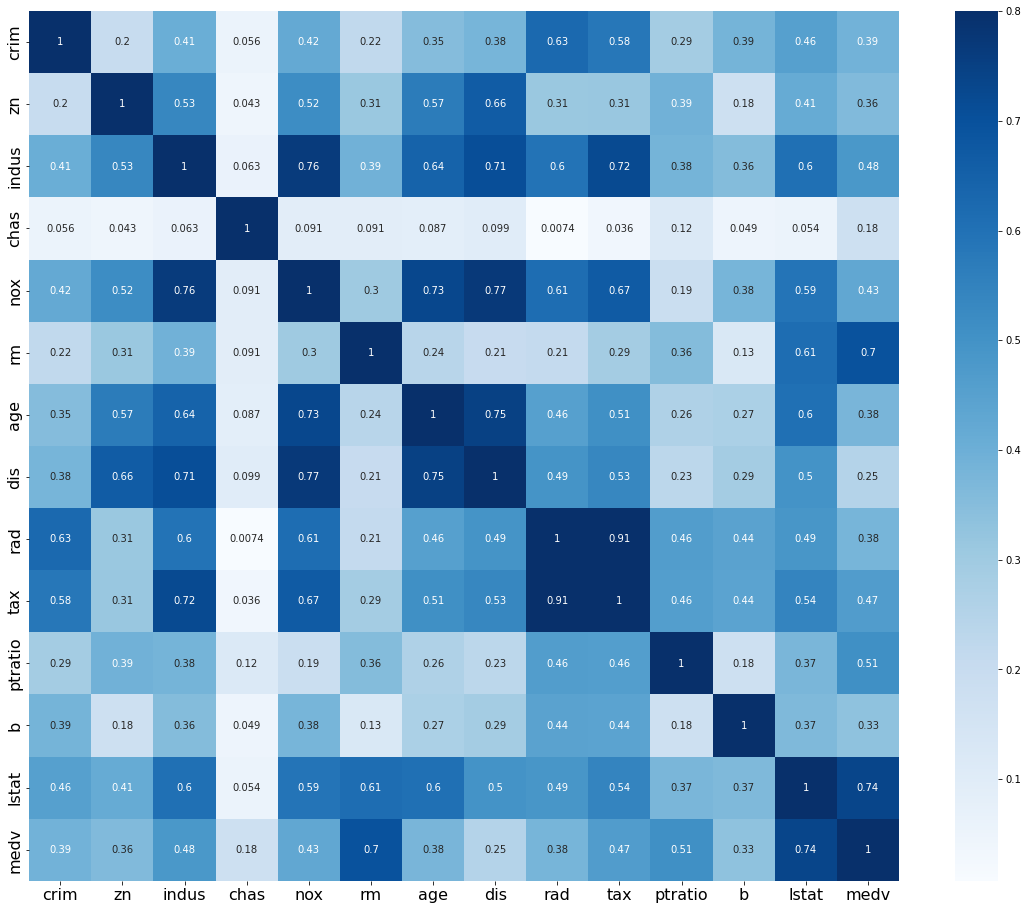

In [6]:
corr = data.corr().abs() # here i use the absolute value

ax = plt.subplots(figsize=(20, 16))
ax = sns.heatmap(corr, vmax=.8, square=True, annot=True, cmap='Blues')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

In [7]:
upper_tri = corr.where((np.triu(np.ones(corr.shape), k=1) + np.tril(np.ones(corr.shape), k=-1)).astype(bool))
# here i choose 0.75 as the threshold
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.75)]
to_keep = [i for i in attributes if i not in to_drop]

print('we need to drop these columns: ', to_drop)
print('we need to keep these columns: ', to_keep)
print('the number of columns that we decide to keep: ', len(to_keep))

we need to drop these columns:  ['indus', 'nox', 'dis', 'rad', 'tax']
we need to keep these columns:  ['crim', 'zn', 'chas', 'rm', 'age', 'ptratio', 'b', 'lstat']
the number of columns that we decide to keep:  8


#### Step 4. Scale the columns and show the regression

In [8]:
attributes_new = to_keep
min_max_scaler = preprocessing.MinMaxScaler()

def scaleColumns(input_data, cols_to_scale):
    output_data = pd.DataFrame()
    for col in cols_to_scale:
        output_data[col] = pd.DataFrame(min_max_scaler.fit_transform(pd.DataFrame(input_data[col])),columns=[col])
    return output_data

data_scale = scaleColumns(input_data=data, cols_to_scale=attributes_new)
data_scale['medv'] = data['medv']
data_scale.head()

,crim,zn,chas,rm,age,ptratio,b,lstat,medv
0,0.000000,0.18,0.0,0.577505,0.641607,0.287234,1.000000,0.089680,24.0
1,0.000236,0.00,0.0,0.547998,0.782698,0.553191,1.000000,0.204470,21.6
2,0.000236,0.00,0.0,0.694386,0.599382,0.553191,0.989737,0.063466,34.7
3,0.000293,0.00,0.0,0.658555,0.441813,0.648936,0.994276,0.033389,33.4
4,0.000705,0.00,0.0,0.687105,0.528321,0.648936,1.000000,0.099338,36.2


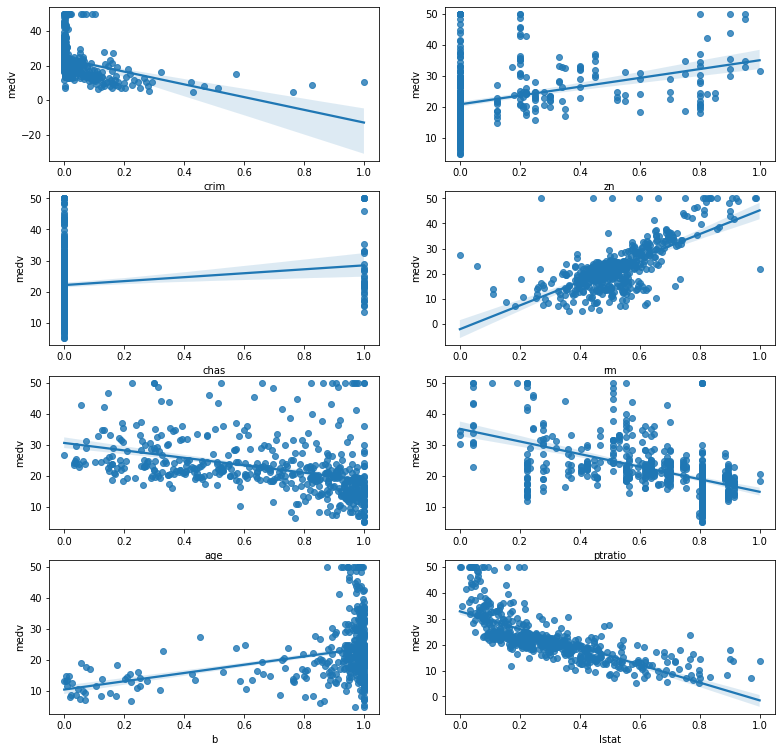

In [9]:
fig, axs = plt.subplots(4,2,figsize=(13,13))

for i in range(8):
       sns.regplot(data=data_scale, x=attributes_new[i], y='medv', ci=95, ax=axs[i//2, i%2])

plt.show()

#### Step 5. Split the dataset and learn the parameters

In [10]:
from sklearn.model_selection import train_test_split

# split the dataset
df_attributes = data_scale.drop(columns='medv')
df_medv = data_scale['medv']
# x_train, x_validate, y_train, y_validate = train_test_split(df_attributes, df_medv, test_size=0.20)
data_train, data_valid = train_test_split(data_scale, test_size=0.20)

In [11]:
# compute the cost
def compute_cost(input_x, input_y, w):
    '''we use rmse as our loss function'''
    n = len(input_x)
    a = np.power(((input_x @ w.T)-input_y), 2)
    b = np.sum(a)
    mse = b/n
    return math.sqrt(mse)

def gradient_descent(input_x, input_y, w, iters, alpha):
    cost = np.zeros(iters)
    n = len(input_x)
    for i in range(iters):
        w = w - (alpha / n)*np.sum(input_x * (input_x @ w.T - input_y), axis=0)
        cost[i] = compute_cost(input_x, input_y, w)
    return w, cost

In [12]:
# get a matrix
X = data_train.iloc[:,0:8]
ones = np.ones([X.shape[0], 1])
x_train = np.concatenate((ones, X), axis=1)

y_train = data_train.iloc[:, 8:9].values
# w = np.array([[1,1,1,1,1,1,1,1,1]])
w = np.zeros([1,9])

# parameters setting
alpha = 0.01
iters = 1000

In [13]:
# train the model
w_, cost = gradient_descent(x_train, y_train, w, iters, alpha)
print(w_)

[[ 9.78866145 -1.90234955  5.03725396  2.78482047 11.36467735  0.01863598
  -1.94370254 10.49330973 -6.61926991]]


Text(0.5, 1.0, 'RMSE loss curve')

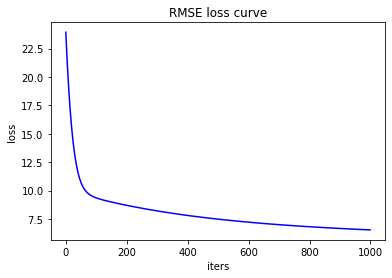

In [14]:
# show the loss function plot
fig, ax = plt.subplots()  
ax.plot(np.arange(iters), cost, color='blue')  
ax.set_xlabel('iters')  
ax.set_ylabel('loss')
ax.set_title('RMSE loss curve')  

In [15]:
# prediction
X = data_valid.iloc[:,0:8]
ones = np.ones([X.shape[0], 1])
x_pred = np.concatenate((ones, X), axis=1)

y_true = data_valid.iloc[:, 8:9].values
y_pred = x_pred @ w_.T

# compute R^2 and RMSE
def cal_r2(y_true, y_pred):
    n = len(y_pred)
    y_mean = np.sum(y_true)/n
    r2_nume = np.sum(np.power(y_pred-y_true, 2))
    r2_deno = np.sum(np.power(y_mean-y_true, 2))
    r2 = 1 - r2_nume/r2_deno
    return r2

def cal_rmse(y_true, y_pred):
    n = len(y_pred)
    rmse_nume = np.sum(np.power(y_pred-y_true, 2))
    rmse = math.sqrt(rmse_nume/n)
    return rmse

print('R^2: ', cal_r2(y_true, y_pred))
print('RMSE: ', cal_rmse(y_true, y_pred))

R^2:  0.5107443055446264
RMSE:  5.850383670436393


### Repeat the above steps

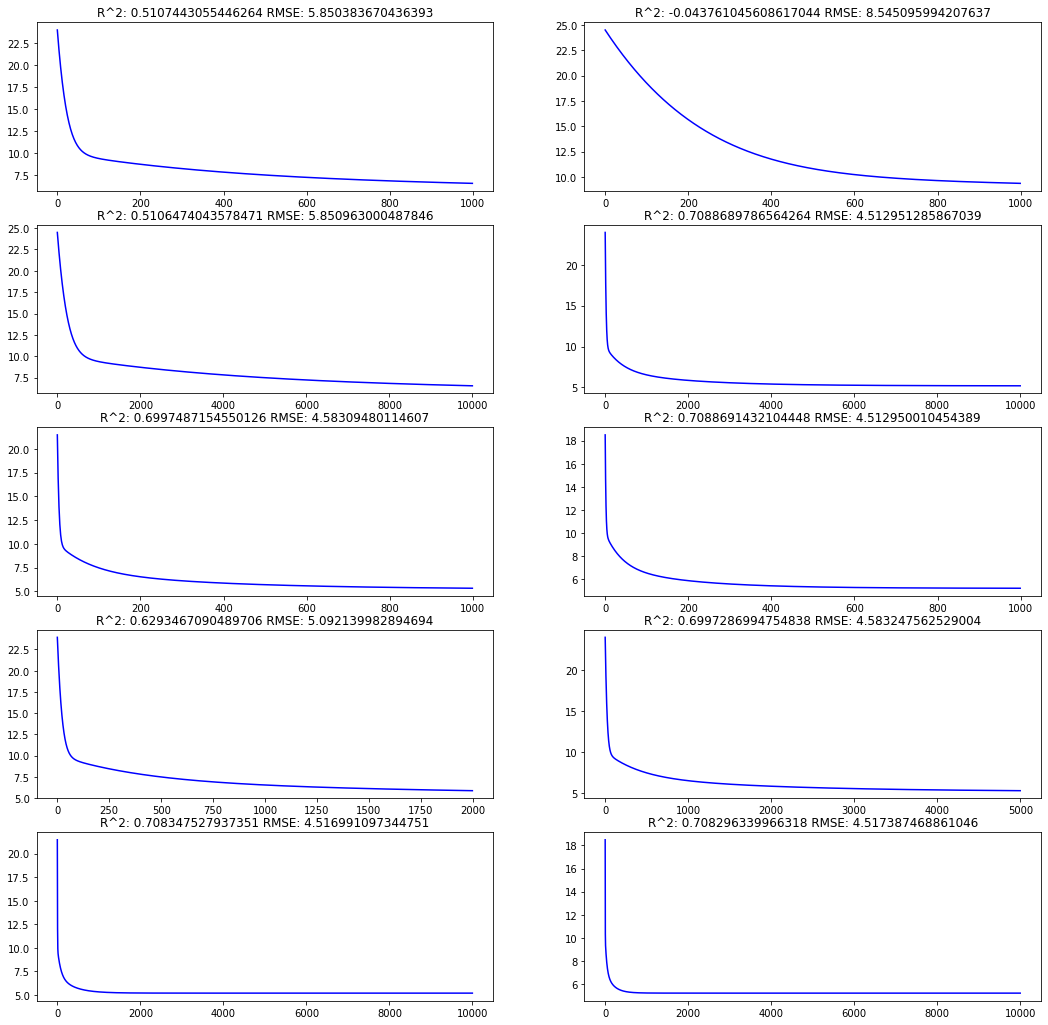

In [43]:
fig, axs = plt.subplots(5,2, figsize=(18,18))
alpha_list = [0.01, 0.001, 0.001, 0.01, 0.05, 0.1, 0.01, 0.01, 0.05, 0.1]
iters_list = [1000, 1000, 10000, 10000, 1000, 1000, 2000, 5000, 10000, 10000]

for i in range(len(alpha_list)):
    w_, cost = gradient_descent(x_train, y_train, w, iters_list[i], alpha_list[i])
    y_pred = y_pred = x_pred @ w_.T
    r2 = cal_r2(y_true, y_pred)
    rmse = cal_rmse(y_true, y_pred)

    axs[i//2, i%2].plot(np.arange(iters_list[i]), cost, color='blue')
    axs[i//2, i%2].set_title(f'R^2: {r2} RMSE: {rmse}')


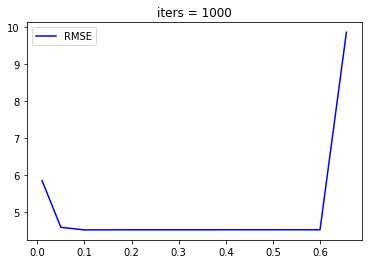

In [42]:
# fixed iters
alpha_list = [0.01, 0.05, 0.1, 0.15, 0.20, 0.3, 0.45, 0.5, 0.60, 0.656]
iters = 1000
r2_list = []
rmse_list = []

for i in range(len(alpha_list)):
    w_, cost = gradient_descent(x_train, y_train, w, iters, alpha_list[i])
    y_pred = y_pred = x_pred @ w_.T
    r2 = cal_r2(y_true, y_pred)
    r2_list.append(r2)
    rmse = cal_rmse(y_true, y_pred)
    rmse_list.append(rmse)

plt.figure()
# plt.plot(alpha_list, np.array(r2_list), color='red', label='R^2')
plt.plot(np.array(alpha_list), np.array(rmse_list), color='blue', label='RMSE')
plt.legend()
plt.title('iters = 1000')
plt.show()

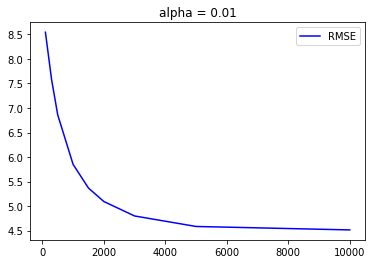

In [18]:
# fixed alpha
iters_list = [100, 300, 500, 1000, 1500, 2000, 3000, 5000, 10000]
alpha = 0.01
r2_list = []
rmse_list = []
for i in range(len(iters_list)):
    w_, cost = gradient_descent(x_train, y_train, w, iters_list[i], alpha)
    y_pred = y_pred = x_pred @ w_.T
    r2 = cal_r2(y_true, y_pred)
    r2_list.append(r2)
    rmse = cal_rmse(y_true, y_pred)
    rmse_list.append(rmse)

plt.figure()
# plt.plot(alpha_list, np.array(r2_list), color='red', label='R^2')
plt.plot(np.array(iters_list), np.array(rmse_list), color='blue', label='RMSE')
plt.legend()
plt.title('alpha = 0.01')
plt.show()